Despite its name, Logistic Regression is a classification algorithm.
It models:

𝑃 = P(y=1∣x)

i.e., the probability that the output belongs to class 1.

In [1]:
import pandas as pd

data = {
    "Age": [22, 25, 47, 52, 46, 56, 30, 35],
    "Salary": [20000, 25000, 80000, 110000, 75000, 120000, 40000, 50000],
    "Purchased": [0, 0, 1, 1, 1, 1, 0, 0]
}

df = pd.DataFrame(data)
df


,Age,Salary,Purchased
0,22,20000,0
1,25,25000,0
2,47,80000,1
3,52,110000,1
4,46,75000,1
5,56,120000,1
6,30,40000,0
7,35,50000,0


In [3]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

X = df[['Age','Salary']]
y = df['Purchased']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_scaled

array([[-1.42654167, -1.2824469 ],
       [-1.17663656, -1.1399528 ],
       [ 0.65600091,  0.4274823 ],
       [ 1.07250943,  1.2824469 ],
       [ 0.57269921,  0.2849882 ],
       [ 1.40571625,  1.5674351 ],
       [-0.76012804, -0.7124705 ],
       [-0.34361953, -0.4274823 ]])

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,y,test_size=0.25,random_state=42
)

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [12]:
y_pred = model.predict(X_test)
y_pred

array([0, 1])

In [14]:
y_prob = model.predict_proba(X_test)
y_prob

array([[0.87034514, 0.12965486],
       [0.06996739, 0.93003261]])

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[1, 0],
       [0, 1]])

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])

roc_auc_score(y_test, y_prob[:,1])


np.float64(1.0)

In [19]:
model.coef_


array([[0.91093352, 0.79000593]])

In [20]:
df = pd.read_csv('admission.csv')

In [21]:
df.shape,df.head()

((400, 4),
    ADMIT  GRE   GPA  RANK
 0      0  380  3.61     3
 1      1  660  3.67     3
 2      1  800  4.00     1
 3      1  640  3.19     4
 4      0  520  2.93     4)

In [22]:
std_sca = StandardScaler()

In [26]:
x_train[['GRE','GPA']] = std_sca.fit_transform(x_train[['GRE','GPA']])
x_test[['GRE','GPA']] = std_sca.transform(x_test[['GRE','GPA']])

NameError: name 'x_train' is not defined

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ADMIT   400 non-null    int64  
 1   GRE     400 non-null    int64  
 2   GPA     400 non-null    float64
 3   RANK    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [28]:
### outlier capping
def outlier_capping(df,columns):
    Q1= df[columns].quantile(0.25)
    Q3= df[columns].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[columns]= df[columns].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(include=['int','float']).columns:
    outlier_capping(df,col)

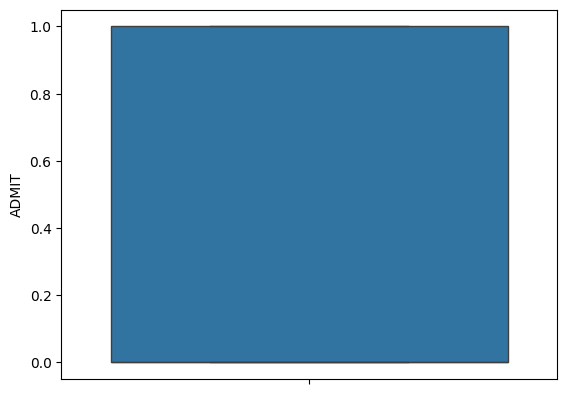

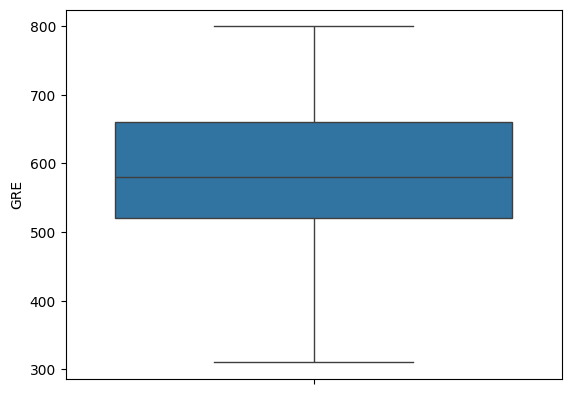

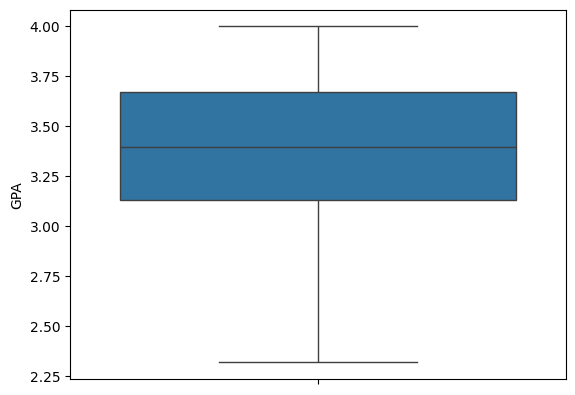

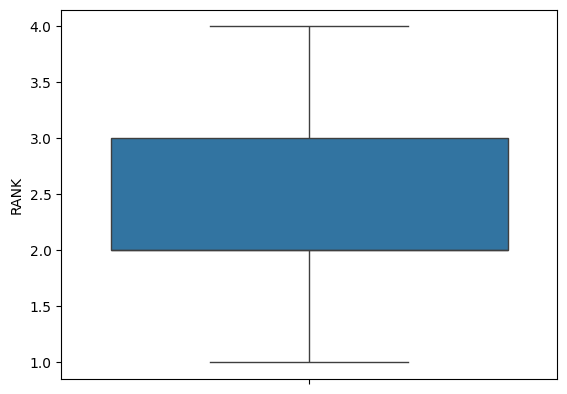

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in df.columns:
    sns.boxplot(data=df,y=col)
    plt.show()

In [33]:
y = df[['ADMIT']]
X = df.drop(columns = ['ADMIT'])

In [36]:
from sklearn.feature_selection import f_classif
f_cla = f_classif(X,y)
pd.Series(f_cla[0],index = X.columns).sort_values(ascending=False)

C:\Users\Kaveeshvar\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RANK    24.870108
GRE     14.014637
GPA     13.045022
dtype: float64

In [37]:
# Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state=100)

In [38]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Kaveeshvar\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [39]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.6375

In [40]:
model.coef_

array([[ 0.00280276,  0.65452881, -0.6010035 ]])

In [41]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [43]:
# Predict probabilities - This will have sigmoid values for each observation
model.predict_proba(X_test)

array([[0.68349599, 0.31650401],
       [0.86825561, 0.13174439],
       [0.49250101, 0.50749899],
       [0.85949518, 0.14050482],
       [0.91921539, 0.08078461],
       [0.67331543, 0.32668457],
       [0.62262094, 0.37737906],
       [0.82510199, 0.17489801],
       [0.75469853, 0.24530147],
       [0.73247105, 0.26752895],
       [0.87363097, 0.12636903],
       [0.55437965, 0.44562035],
       [0.84190626, 0.15809374],
       [0.72430394, 0.27569606],
       [0.61684508, 0.38315492],
       [0.85690115, 0.14309885],
       [0.58008343, 0.41991657],
       [0.84935154, 0.15064846],
       [0.82657453, 0.17342547],
       [0.81613463, 0.18386537],
       [0.86773621, 0.13226379],
       [0.6846554 , 0.3153446 ],
       [0.57459378, 0.42540622],
       [0.52277879, 0.47722121],
       [0.53724228, 0.46275772],
       [0.76277891, 0.23722109],
       [0.75717809, 0.24282191],
       [0.69531593, 0.30468407],
       [0.80230344, 0.19769656],
       [0.84096508, 0.15903492],
       [0.

In [46]:
# Getting only the sigmoid values for the positive class
sigmoid = model.predict_proba(X_test)[:,1]

In [49]:
# Calculate log loss
from sklearn.metrics import accuracy_score,log_loss

log_loss(y_test,sigmoid)

0.6182449789407413

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
conf = confusion_matrix(y_test,y_pred)
conf

array([[49,  5],
       [24,  2]])

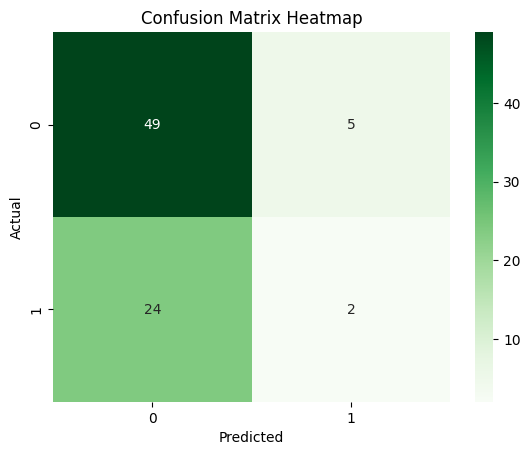

In [52]:
sns.heatmap(conf,annot=True,fmt='d',cmap=plt.cm.Greens)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap');

In [53]:
"""
Here, precision, recall, f1-score for the model
Precision: Of all the instances predicted as positive, how many are actually positive.
Recall: Of all the actual positive instances, how many were correctly predicted as positive.
f1-score: The harmonic mean of precision and recall, providing a single metric that balances both.
support: The number of actual occurrences of each class in the dataset.
"""
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77        54
           1       0.29      0.08      0.12        26

    accuracy                           0.64        80
   macro avg       0.48      0.49      0.45        80
weighted avg       0.55      0.64      0.56        80

